<a href="https://colab.research.google.com/github/SanD172/DAV-LAB/blob/main/DAV_Exp3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aim :** To study and implement Multiple Linear Regression

**Lab Outcomes (LO) :**Implement various Regression techniques for prediction. (LO2)

**Task to be performed :**

List the packages to be used for Multiple Linear Regression in Python.

Download the dataset from UCI Repository / Kaggle

Load data into Google Colab

Display the summary of the dataset

Create a model and fit it

Get the values : Coefficient of Determination, Intercept and Coefficients

Predict the response

Visualize the results with a graph

Repeat the steps 2 to 6 using R libraries

In [2]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
df = pd.read_csv("data.csv")


In [4]:
df.head()


,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [ ]:
df.shape

(36, 5)

In [ ]:
print(df.describe())

            Volume       Weight         CO2
count    36.000000    36.000000   36.000000
mean   1611.111111  1292.277778  102.027778
std     388.975047   242.123889    7.454571
min     900.000000   790.000000   90.000000
25%    1475.000000  1117.250000   97.750000
50%    1600.000000  1329.000000   99.000000
75%    2000.000000  1418.250000  105.000000
max    2500.000000  1746.000000  120.000000


In [ ]:
#independent values and call this variable X. Put the dependent values in a variable called y.
X = df[['Weight', 'Volume']]
y = df['CO2'

In [ ]:
#Model Building
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [ ]:
y_train.shape

(25,)

In [ ]:
y_test.shape

(11,)

In [ ]:
reg_model = linear_model.LinearRegression()

In [ ]:
#Fitting the Multiple Linear Regression model
reg_model = LinearRegression().fit(X_train, y_train)

In [ ]:
#Predicting the Test and Train set result
y_pred= reg_model.predict(X_test)
x_pred= reg_model.predict(X_train)

In [ ]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [ 90.41571939 102.16323413  99.56363213 104.56661845 101.54657652
  95.94770019 108.64011848 102.22654214  92.80374837  97.27327129
  97.57074463]


In [ ]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff


,Actual value,Predicted value
0,99,90.415719
19,105,102.163234
32,104,99.563632
35,120,104.566618
7,92,101.546577
12,99,95.947700
29,114,108.640118
33,108,102.226542
5,105,92.803748
1,95,97.273271


In [ ]:
# Get the model coefficients
print('Intercept:', reg_model.intercept_)
print('Coefficients:', reg_model.coef_)


Intercept: 74.33882836589245
Coefficients: [0.01718006 0.00250464]


In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 6.901980901636316
Mean Square Error: 63.39765310998794
Root Mean Square Error: 7.96226432053018


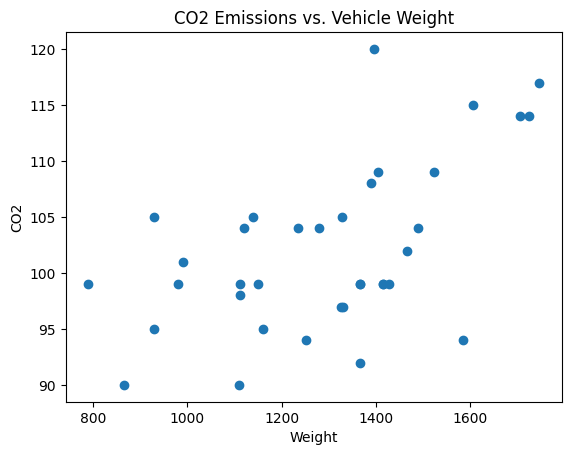

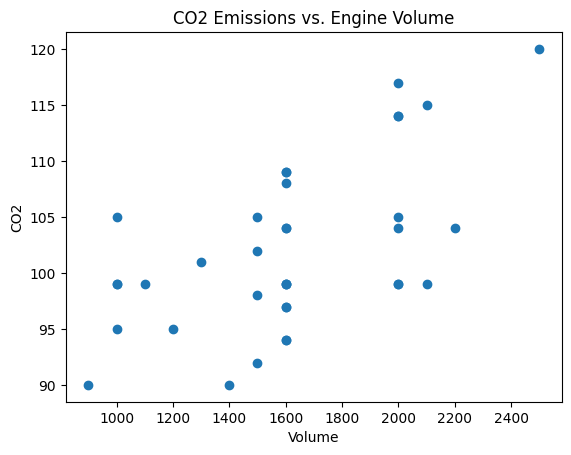

In [ ]:
# Visualize the relationship between 'Weight' and 'CO2'
plt.scatter(df['Weight'], df['CO2'])
plt.xlabel('Weight')
plt.ylabel('CO2')
plt.title('CO2 Emissions vs. Vehicle Weight')
plt.show()

# Visualize the relationship between 'Volume' and 'CO2'
plt.scatter(df['Volume'], df['CO2'])
plt.xlabel('Volume')
plt.ylabel('CO2')
plt.title('CO2 Emissions vs. Engine Volume')
plt.show()


## **MULTIPLE LINEAR REGRESSION IN R**


In [1]:
# Install the caret package
install.packages("broom")

# Load the caret package
library(ggplot2)
library(dplyr)
library(broom)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# Suppress warnings
options(warn=-1)

# Read the dataset
df <- read.csv("data.csv", header = TRUE)
head(df)

,Car,Model,Volume,Weight,CO2
,<chr>,<chr>,<int>,<int>,<int>
1,Toyoty,Aygo,1000,790,99
2,Mitsubishi,Space Star,1200,1160,95
3,Skoda,Citigo,1000,929,95
4,Fiat,500,900,865,90
5,Mini,Cooper,1500,1140,105
6,VW,Up!,1000,929,105


In [11]:
# Set correct column names
colnames(df) <- c("Car", "Model", "Volume", "Weight", "CO2")

In [12]:
# Define independent and dependent variables
X <- df[, c("Weight", "Volume")]
y <- df$CO

In [13]:
# Split the data into training and testing sets
set.seed(123)
train_index <- sample(1:nrow(df), 0.7 * nrow(df))
X_train <- X[train_index, ]
X_test <- X[-train_index, ]
y_train <- y[train_index]
y_test <- y[-train_index]

In [30]:
# Create train_data with specified column names
train_data <- data.frame(Weight = X_train$Weight, Volume = X_train$Volume, CO2 = y_train)

In [31]:
# Fit the linear regression model
reg_model <- lm(CO2 ~ ., data = train_data)

In [33]:
# Printing the model coefficients
print(tidy(reg_model))

# A tibble: 3 × 5
  term        estimate std.error statistic  p.value
  <chr>          <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept) 75.6       6.25        12.1  3.46e-11
2 Weight       0.0126    0.00748      1.68 1.07e- 1
3 Volume       0.00611   0.00552      1.11 2.80e- 1


In [36]:
# Predicting the test set result
y_pred <- predict(reg_model, newdata = X_test)
y_pred


2         6        12        13        16        17        23        24 
 97.48093  93.35526  95.95493  95.65563 102.06173 102.50169 105.55650 103.13021 
       27        35        36 
106.51683 103.00451 108.37745

In [38]:
# Get the intercept and coefficients
intercept <- coef(reg_model)[1]
coefficients <- coef(reg_model)[-1]

# Print the intercept and coefficients
cat("Intercept:", intercept, "\n")
cat("Coefficients:", coefficients, "\n")


Intercept: 75.56779 
Coefficients: 0.01257035 0.00610961 


In [35]:
# Evaluate the model
mae <- mean(abs(y_pred - y_test))
mse <- mean((y_pred - y_test)^2)
rmse <- sqrt(mean((y_pred - y_test)^2))

print(paste("Mean Absolute Error:", mae))
print(paste("Mean Squared Error:", mse))
print(paste("Root Mean Squared Error:", rmse))


[1] "Mean Absolute Error: 5.62728389842059"
[1] "Mean Squared Error: 41.2441730118214"
[1] "Root Mean Squared Error: 6.42216264289697"


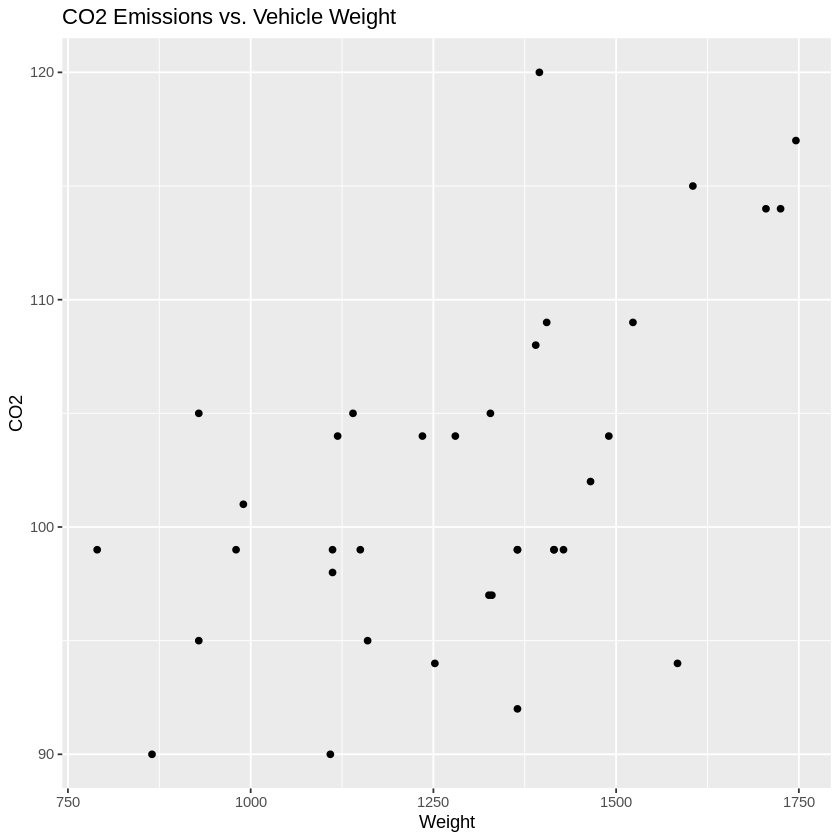

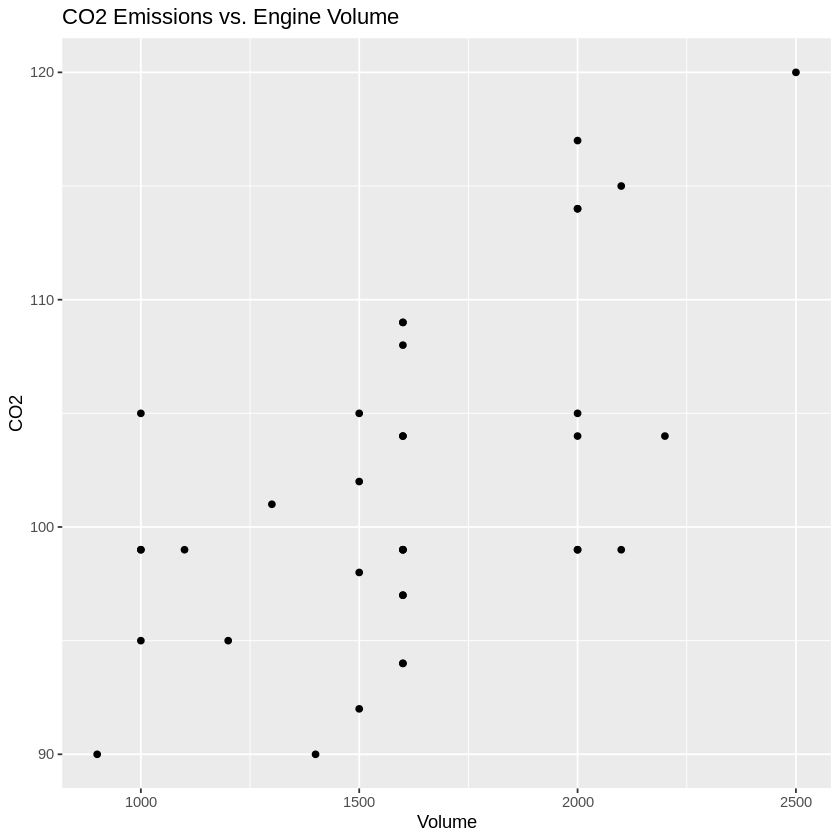

In [28]:

# Visualize the relationship between 'Weight' and 'CO2'
ggplot(df, aes(x = Weight, y = CO2)) +
  geom_point() +
  labs(x = "Weight", y = "CO2", title = "CO2 Emissions vs. Vehicle Weight")

# Visualize the relationship between 'Volume' and 'CO2'
ggplot(df, aes(x = Volume, y = CO2)) +
  geom_point() +
  labs(x = "Volume", y = "CO2", title = "CO2 Emissions vs. Engine Volume")


# **Conclusion:**



1.   Understood the concept of Multiple Linear Regression
2.   Explored the packages in Python and R
3.  Performed Multiple Linear Regression using the Libraries in Python and R







